In [27]:
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error

#Load the saved model from .pkl file
model_name = "XGBoost"  # Change this to the model you want to use (e.g., "XGBoost")
model_file = f"{model_name}_best_model.pkl"
loaded_model = joblib.load(model_file)

#Load the new dataset
test_data = pd.read_csv('test_data.csv')  # Replace with the new dataset's path

X_test = test_data.drop(columns=["SALE_PRC_log"])  # Replace with your target column name
y_test = test_data["SALE_PRC_log"]


y_pred = loaded_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test dataset: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score on test dataset: {r2:.4f}")




Mean Squared Error on test dataset: 0.0219
R2 Score on test dataset: 0.9321


Mean Squared Error on test dataset: 0.0210
R2 Score on test dataset: 0.9349


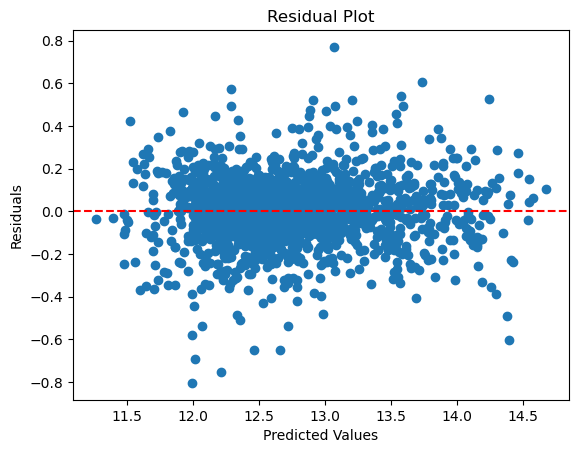

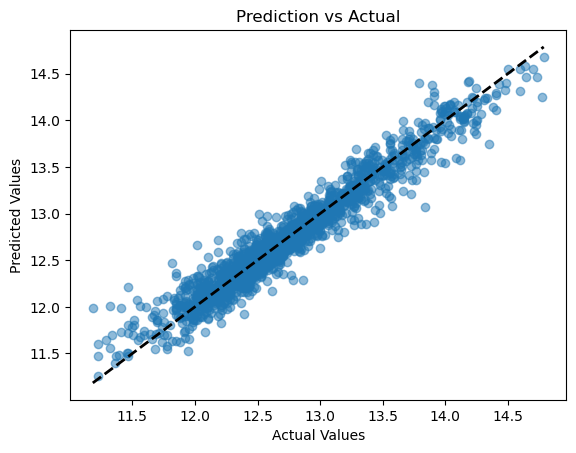

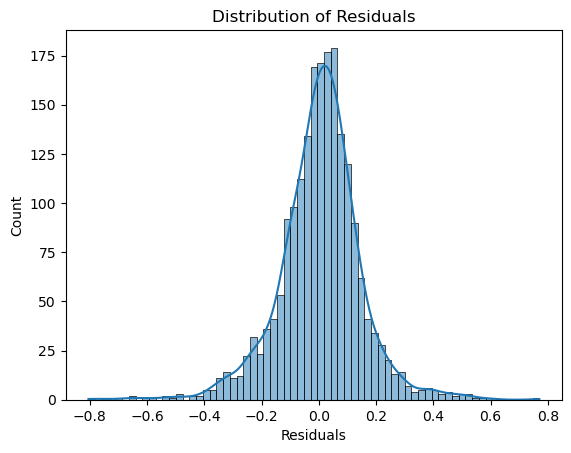

In [33]:
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the saved model from .pkl file
model_name = "XGBoost"  
model_file = f"{model_name}_best_model.pkl"
loaded_model = joblib.load(model_file)

test_data = pd.read_csv('test_data.csv')  
X_test = test_data.drop(columns=["SALE_PRC_log"])  
y_test = test_data["SALE_PRC_log"]

train_data = pd.read_csv('train_data.csv')  
X_train = train_data.drop(columns=["SALE_PRC_log"])  
y_train = train_data["SALE_PRC_log"]

val_data = pd.read_csv('val_data.csv') 
X_val = val_data.drop(columns=["SALE_PRC_log"])  
y_val = val_data["SALE_PRC_log"]

X_train_all = pd.concat([X_val, X_train], axis=0)
y_train_all = pd.concat([y_val, y_train], axis=0)

loaded_model.fit(X_train_all, y_train_all)


y_pred = loaded_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test dataset: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score on test dataset: {r2:.4f}")



residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
plt.show()



sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()





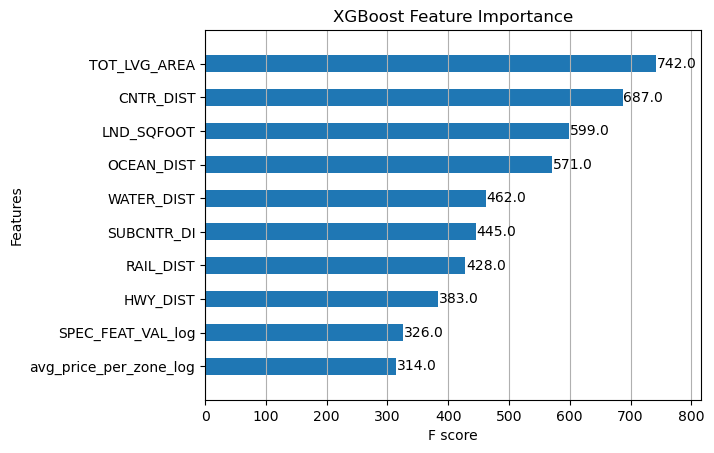

In [30]:

import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance directly using XGBoost's built-in function
xgb.plot_importance(loaded_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("XGBoost Feature Importance")
plt.gca().yaxis.grid(False)  # Removes gridlines for y-axis (horizontal)
plt.show()


Group1 (below or equal to threshold): 5676 records
Group2 (above threshold): 7765 records
MSE for Group1: 0.0157074468756286
MSE for Group2: 0.012636598635101734
R-squared for Group1: 0.9113748875636218
R-squared for Group2: 0.955454839678035


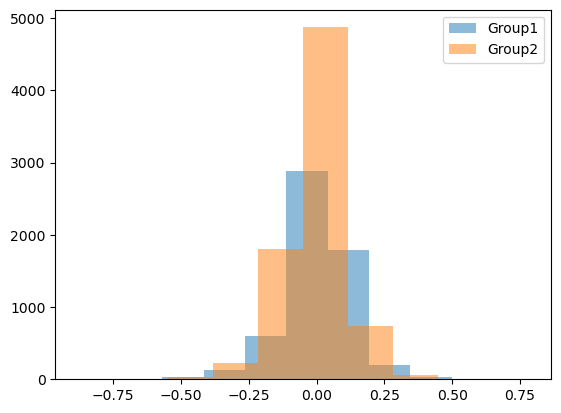

In [29]:
import pandas as pd

df = pd.read_csv("preprocessed_dataset.csv")

X = df.drop(columns=["SALE_PRC_log"])  
y_true = df["SALE_PRC_log"]

threshold = df['avg_price_per_zone_log'].mean()  

# Split the data into two groups based on the threshold

group1_mask = (df['avg_price_per_zone_log'] <= threshold)
group2_mask = (df['avg_price_per_zone_log'] > threshold)

# Check the number of records in each group
print(f"Group1 (below or equal to threshold): {len(df[group1_mask])} records")
print(f"Group2 (above threshold): {len(df[group2_mask])} records")


# Predictions for each group
y_pred_group1 = model.predict(X[group1_mask])
y_pred_group2 = model.predict(X[group2_mask])

# Actual values for each group
y_true_group1 = y_true[group1_mask]
y_true_group2 = y_true[group2_mask]

# Calculate performance metrics for each group
mse_group1 = mean_squared_error(y_true_group1, y_pred_group1)
mse_group2 = mean_squared_error(y_true_group2, y_pred_group2)

r2_group1 = r2_score(y_true_group1, y_pred_group1)
r2_group2 = r2_score(y_true_group2, y_pred_group2)

print(f"MSE for Group1: {mse_group1}")
print(f"MSE for Group2: {mse_group2}")

print(f"R-squared for Group1: {r2_group1}")
print(f"R-squared for Group2: {r2_group2}")


# Calculate residuals for each group
residuals_group1 = y_true_group1 - y_pred_group1
residuals_group2 = y_true_group2 - y_pred_group2

# Check the distribution of residuals for each group
import matplotlib.pyplot as plt
plt.hist(residuals_group1, alpha=0.5, label='Group1')
plt.hist(residuals_group2, alpha=0.5, label='Group2')
plt.legend()
plt.show()

